#**Net Promoter Score**

## **How likely is it that you would recommend [Organization X] to a friend or colleague?**

Net promoter score (NPS) is a market research metric that is based on a single survey question asking respondents to rate the likelihood that they would recommend a company, product, or a service to a friend or colleague. The NPS assumes a subdivision of respondents into "promoters" who provide ratings of 9 or 10, "passives" who provide ratings of 7 or 8, and "detractors" who provide ratings of 6 or lower. The net promoter score results from a calculation that involves subtracting the percentage of detractors from the percentage of promoters collected by the survey item.

The NPS is typically interpreted and used as an indicator of customer loyalty.[1] In some cases, it has been argued to correlate with revenue growth relative to competitors within an industry,[5] although it has also been demonstrated that NPS scores vary substantially between industries.[6] NPS has been widely adopted by Fortune 500 companies and other organizations.[7][3] Proponents of the Net Promoter approach claim the score can be used to motivate an organization to become more focused on improving products and services.[8]: 199–200  As of 2020, versions of the NPS are now used by two-thirds of Fortune 1000 companies.[9]

-Wikipedia

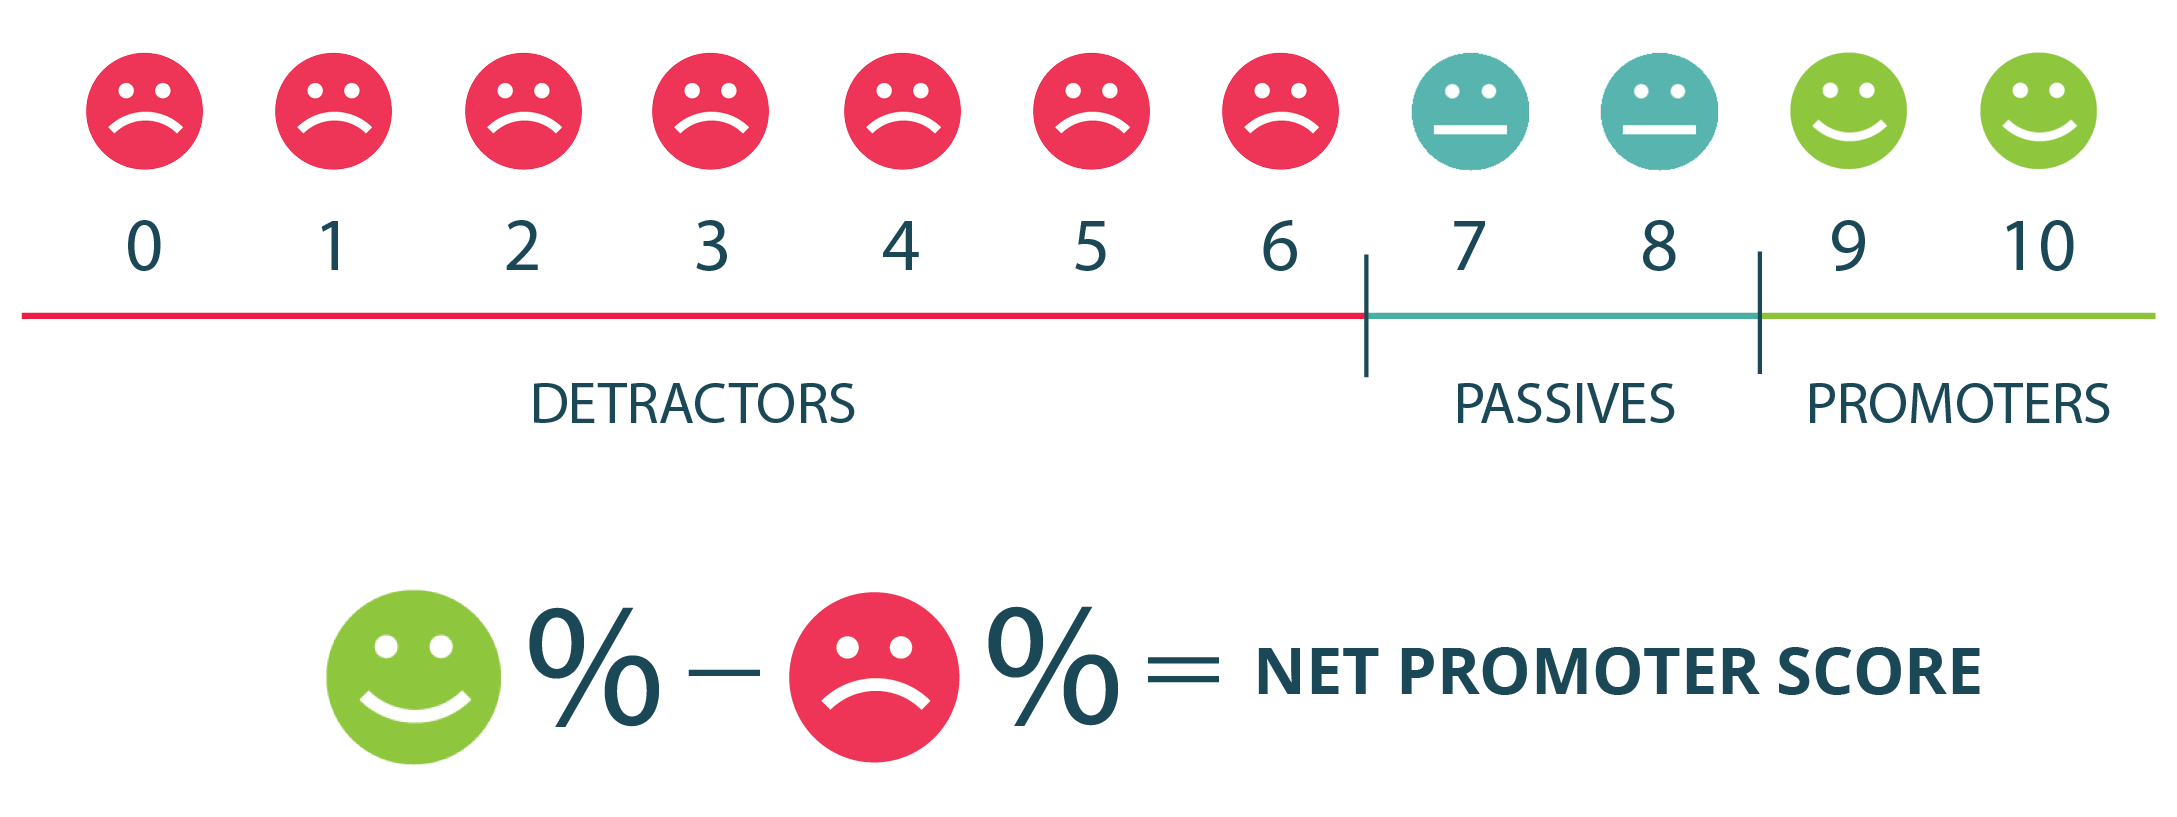

#**Import Libraries**

In [ ]:
# import libraries

import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#**Load Data**

In [ ]:
# load .csv file

df = pd.read_csv('/content/NPStimeseries.csv',
                 parse_dates=['Survey date'])

# examine first five rows of the dataset

df.sample(5)

<ipython-input-2-54514379c143>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/NPStimeseries.csv',


,ID,Market,Survey date,Customer Name,NPS
1871,2871,US,2021-06-09,Matthew Vaughn,10
2294,3294,MEX,2021-09-30,Robert Holmes,10
3972,4972,US,2021-10-26,Shawn Rodriguez,0
1341,2341,US,2021-02-04,Patrick Klein,8
4172,5172,US,2021-05-20,Cassandra Stephenson,8


# **Explore Data**


1.   Summary informatiom
2.   Summary statistics
2.   Invalid & missing values
2.   Duplicates
2.   Outliers & irrelevant data
2.   Distribution



**Summary information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             5000 non-null   int64         
 1   Market         5000 non-null   object        
 2   Survey date    5000 non-null   datetime64[ns]
 3   Customer Name  5000 non-null   object        
 4   NPS            5000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 195.4+ KB


**Summary statistics**

In [ ]:
df.NPS.describe()

count    5000.00000
mean        6.84120
std         3.49228
min         0.00000
25%         5.00000
50%         8.00000
75%        10.00000
max        10.00000
Name: NPS, dtype: float64

**Invalid & Missing values**

In [ ]:
df.isnull().sum()

ID               0
Market           0
Survey date      0
Customer Name    0
NPS              0
dtype: int64

There are no missing values.

**Duplicates**

In [ ]:
df.ID.duplicated(keep=False).sum() #zero duplicated

0

There are no duplicates in the ID column.

 **Outliers & Irrevevant data**



In [ ]:
# @title
# Net Promoter Score Distribution

fig = px.box(df, x="NPS",
                   template = 'plotly_white',
                   color="Market",
                   facet_col="Market",
#                    title = 'NPS score Histogram',
                   color_discrete_map = {'MEX': '#6baed6','UK':'#3182bd' ,'US': '#bdd7e7'})

fig.update_layout(showlegend = False, plot_bgcolor='white',
                  yaxis_title='Frequency',width=1050, height=400)
fig.show()

NPS scale is rated from 0 (not at all likely) to 10 (extremely likely).

There are no outliers, all values are within the range of 0 - 10.

**Distribution**

In [ ]:
#@title
# Net Promoter Score Distribution

fig = px.histogram(df, x="NPS",
                   template = 'plotly_white',
                   color="Market",
                   facet_col="Market",
#                    title = 'NPS score Histogram',
                   color_discrete_map = {'MEX': '#6baed6','UK':'#3182bd' ,'US': '#bdd7e7'})

fig.update_layout(showlegend = False, plot_bgcolor='white',yaxis_title='Frequency',
                  xaxis_visible=False, xaxis2_visible=False, xaxis3_visible=False,
                  width=1050, height=400)
fig.show()

Net Promoter Scores seem to be skewed to the right, most of the scores are on the higher side.

#**Cleaning & Transformation**



1.   Transform columns labels
2.   Derive new columns




**Transform column labels**

In [ ]:
def clean_col (val):
    return val.strip().lower().replace(' ', '_') # column labels to lower

df = df.rename(columns=clean_col)

**Derive new columns**

In [ ]:
# assign nps categories and derive new columns
# Promoter >=9
# Detractor >6 & <9
# Passive <=6

conditions = [
    (df['nps'] <= 6),
    ((df['nps'] >6 )& (df['nps'] < 9)),
    (df['nps'] >= 9)
]

values = ['Detractor', 'Passive', 'Promoter']

df = (df
      .assign(nps_category=np.select(conditions, values))
      .assign(weekday=df.survey_date.dt.day_name())
      .assign(month=df.survey_date.dt.month_name())
      .assign(quarter=df.survey_date.dt.quarter)
      .assign(month_number=df.survey_date.dt.month)
      .assign(day_number=df.survey_date.dt.dayofweek))

#**Net Promoter Score Frequency**

In [ ]:
#@title
glbl = pd.merge((pd.DataFrame(df['nps_category']
              .value_counts())
 .reset_index()
 .rename({'index':'nps_category',
          'nps_category':'abs_freq'},
         axis=1)),

(pd.DataFrame(df['nps_category']
              .value_counts(normalize=True))
 .reset_index()
 .rename({'index':'nps_category',
          'nps_category':'rel_freq'},
         axis=1)), on='nps_category')

glbl

,nps_category,abs_freq,rel_freq
0,Promoter,2309,0.4618
1,Detractor,1719,0.3438
2,Passive,972,0.1944


Out of the 5,000 observations,

there are 2,309 (46.2%) observations where the NPS category is “Promoter,”

1,719 (34.4%) where it is “Detractor,” and 972 (19.4%) where it is “ Passive”.

**Donut Chart**

In [ ]:
#@title
names = ['Promoter','Detractor','Passive']
fig = px.pie(values=[2309,1719,972],
             names=names,
             hole=.3,
             color=names,
             color_discrete_map={'Promoter':'#bdd7e7',
                                 'Detractor':'#6baed6',
                                 'Passive':'#3182bd'})
fig.update_layout(autosize=False)
fig.show()

#**Global Net Promoter Score**

In [ ]:
Global_Net_Promoter_Score = (glbl.iloc[0,2] - glbl.iloc[1,2]) * 100
Global_Net_Promoter_Score

11.799999999999999

#**Net Promoter Score by Market**

In [ ]:
#@title
dfmarket = df.groupby(['market','nps_category'])['id'].count().unstack()
dfmarket['Total'] = dfmarket.sum(axis = 1)
dfmarket = dfmarket.reset_index()

dfmarket['nps_score'] = (dfmarket['Promoter']/dfmarket['Total']
                         - dfmarket['Detractor']/dfmarket['Total'])*100
dfmarket = dfmarket.round(2)

dfmarket

nps_category,market,Detractor,Passive,Promoter,Total,nps_score
0,MEX,509,349,791,1649,17.10
1,UK,609,356,755,1720,8.49
2,US,601,267,763,1631,9.93


In [ ]:
#@title
fig = px.bar(dfmarket, x = 'market',
             y = 'nps_score',
#              title = 'NPS score | Market',
             template= 'plotly_white',
             color = 'market',
             text='nps_score',
             color_discrete_map = {'MEX': '#bdd7e7','UK':'#6baed6' ,'US': '#3182bd'})
fig.update_layout(showlegend=False, autosize=False,
                  yaxis_title='Net Promoter Score',xaxis_title='Market')
fig.show()

#**Monthly Net Promoter Score**

**Mexico**

In [ ]:
#@title
dfmex = (df.query("market=='MEX'")
.groupby(['month','month_number','nps_category'])['id']
.count()
.unstack()
.reset_index()
         .sort_values('month_number',ascending=True)
         .drop('month_number', axis=True)
)

dfmex['Total'] = dfmex.iloc[:,1:4].sum(axis = 1)
dfmex['nps_score'] = (dfmex['Promoter']/dfmex['Total']
                      - dfmex['Detractor']/dfmex['Total'])*100
dfmex

nps_category,month,Detractor,Passive,Promoter,Total,nps_score
4,January,44,25,53,122,7.377049
3,February,46,32,60,138,10.144928
7,March,36,20,54,110,16.363636
0,April,56,35,64,155,5.161290
8,May,34,25,78,137,32.116788
6,June,43,27,68,138,18.115942
5,July,45,29,73,147,19.047619
1,August,48,38,72,158,15.189873
11,September,39,32,60,131,16.030534
10,October,43,30,61,134,13.432836


In [ ]:
#@title
fig = px.line(dfmex, x='month', y='nps_score',template = 'plotly_white', title = 'NPS for Mexico over time')
fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

**UK**

In [ ]:
#@title
dfuk = (df.query("market=='UK'")
.groupby(['month','month_number','nps_category'])['id']
.count()
.unstack()
.reset_index().sort_values('month_number',ascending=True).drop('month_number', axis=True)
)

dfuk['Total'] = dfuk.iloc[:,1:4].sum(axis = 1)
dfuk['nps_score'] = (dfuk['Promoter']/dfuk['Total']
                      - dfuk['Detractor']/dfuk['Total'])*100
dfuk

nps_category,month,Detractor,Passive,Promoter,Total,nps_score
4,January,44,30,82,156,24.358974
3,February,50,26,63,139,9.352518
7,March,38,22,62,122,19.672131
0,April,51,29,56,136,3.676471
8,May,60,28,67,155,4.516129
6,June,53,27,63,143,6.993007
5,July,57,45,73,175,9.142857
1,August,56,31,49,136,-5.147059
11,September,54,24,60,138,4.347826
10,October,54,35,47,136,-5.147059


In [ ]:
#@title
fig = px.line(dfuk,
              x='month',
              y='nps_score',
              template = 'plotly_white')
#               title = 'NPS for UK over time
fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

**US**

In [ ]:
#@title
dfus = (df.query("market=='US'")
.groupby(['month','month_number','nps_category'])['id']
.count()
.unstack()
.reset_index().sort_values('month_number',ascending=True).drop('month_number', axis=True)
)

dfus['Total'] = dfus.iloc[:,1:4].sum(axis = 1)
dfus['nps_score'] = (dfus['Promoter']/dfus['Total']
                      - dfus['Detractor']/dfus['Total'])*100
dfus

nps_category,month,Detractor,Passive,Promoter,Total,nps_score
4,January,47,24,73,144,18.055556
3,February,51,18,64,133,9.774436
7,March,52,28,79,159,16.981132
0,April,43,13,62,118,16.101695
8,May,43,22,66,131,17.557252
6,June,49,23,71,143,15.384615
5,July,56,31,61,148,3.378378
1,August,45,22,70,137,18.248175
11,September,42,22,54,118,10.169492
10,October,62,22,58,142,-2.816901


In [ ]:
#@title
fig = px.line(dfus, x='month', y='nps_score',template = 'plotly_white', title = 'NPS for US over time')
fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

#**Weekly Net Promoter Score**

**Mexico**

In [ ]:
#@title
dfmex = (df.query("market=='MEX'")
.groupby(['weekday','day_number','nps_category'])['id']
.count()
.unstack()
.reset_index().sort_values('day_number',ascending=True).drop('day_number', axis=True)
)

dfmex['Total'] = dfmex.iloc[:,1:4].sum(axis = 1)
dfmex['nps_score'] = (dfmex['Promoter']/dfmex['Total']
                      - dfmex['Detractor']/dfmex['Total'])*100
dfmex

nps_category,weekday,Detractor,Passive,Promoter,Total,nps_score
1,Monday,80,55,106,241,10.788382
5,Tuesday,70,48,117,235,20.000000
6,Wednesday,68,48,118,234,21.367521
4,Thursday,78,49,113,240,14.583333
0,Friday,77,56,112,245,14.285714
2,Saturday,63,48,107,218,20.183486
3,Sunday,73,45,118,236,19.067797


In [ ]:
#@title
fig = px.line(dfmex, x='weekday',
              y='nps_score',
              template = 'plotly_white')
#               title = 'Weekly NPS for Mexico'
fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

**UK**

In [ ]:
#@title
dfmex = (df.query("market=='UK'")
.groupby(['weekday','day_number','nps_category'])['id']
.count()
.unstack()
.reset_index().sort_values('day_number',ascending=True).drop('day_number', axis=True)
)

dfmex['Total'] = dfmex.iloc[:,1:4].sum(axis = 1)
dfmex['nps_score'] = (dfmex['Promoter']/dfmex['Total']
                      - dfmex['Detractor']/dfmex['Total'])*100
dfmex

nps_category,weekday,Detractor,Passive,Promoter,Total,nps_score
1,Monday,75,48,110,233,15.021459
5,Tuesday,69,45,106,220,16.818182
6,Wednesday,93,50,115,258,8.527132
4,Thursday,91,55,120,266,10.902256
0,Friday,95,45,110,250,6.000000
2,Saturday,97,59,91,247,-2.429150
3,Sunday,89,54,103,246,5.691057


In [ ]:
#@title
fig = px.line(dfmex, x='weekday',
              y='nps_score',
              template = 'plotly_white')
fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

**US**

In [ ]:
#@title
dfmex = (df.query("market=='US'")
.groupby(['weekday','day_number','nps_category'])['id']
.count()
.unstack()
.reset_index().sort_values('day_number',ascending=True).drop('day_number', axis=True)
)

dfmex['Total'] = dfmex.iloc[:,1:4].sum(axis = 1)
dfmex['nps_score'] = (dfmex['Promoter']/dfmex['Total']
                      - dfmex['Detractor']/dfmex['Total'])*100
dfmex

nps_category,weekday,Detractor,Passive,Promoter,Total,nps_score
1,Monday,96,48,92,236,-1.694915
5,Tuesday,74,25,111,210,17.619048
6,Wednesday,78,42,112,232,14.655172
4,Thursday,92,46,109,247,6.882591
0,Friday,89,25,98,212,4.245283
2,Saturday,85,43,115,243,12.345679
3,Sunday,87,38,126,251,15.537849


In [ ]:
#@title
fig = px.line(dfmex, x='weekday',
              y='nps_score',
              template = 'plotly_white')

fig.update_layout(showlegend = False)
fig.update_traces(line = {'color':'#08519c'})
fig.update_yaxes(title = 'Net Promoter Score')
fig.show()

In [ ]:
df.to_csv('Nps.csv')